Importing required libraries

In [2]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

/Users/apoorvaupadhyaya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
# Fetch stock data
ticker = 'TSLA'  # Replace with desired stock ticker
data = yf.download(ticker, start='2010-01-01', end='2025-05-01')
data = data[['Close', 'Volume']]


# Add the VIX index as a feature denoting implied volatility
# Adding VIX data in the form of OPEN price, CLOSE price, Volume and the intraday range along with the mean price during the day 

# Calculate moving average and divergence
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data['Divergence'] = data['MA_50'] - data['MA_200']

# Drop rows with NaN values due to rolling calculations
data = data.dropna()
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,Volume,MA_50,MA_200,Divergence
Ticker,TSLA,TSLA,,,
Date,,,,,
2025-04-01,268.459991,146486900,316.2248,287.54930,28.67550
2025-04-02,282.760010,212787800,313.3986,288.05075,25.34785
2025-04-03,267.279999,136174300,310.4420,288.49710,21.94490
2025-04-04,239.429993,180324400,306.9830,288.75705,18.22595
2025-04-07,233.289993,178806651,303.5172,288.99920,14.51800


In [9]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length, :])  # Use all features
        y.append(data[i + seq_length, 0])  # Predict 'Close' price
    return np.array(x), np.array(y)

seq_length = 300
x_train, y_train = create_sequences(train_data, seq_length)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

In [14]:
# Build RNN with LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='nadam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0052
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 5.6843e-04
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 6.8025e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.6643e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.5435e-04
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.1131e-04
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.9569e-04
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.5992e-04
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.3364e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.3687e-04
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.5813e-04
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.0621e-04
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 3.4424e-04
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 1.6398e-04
Epoch 15/20
79/79 ━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━

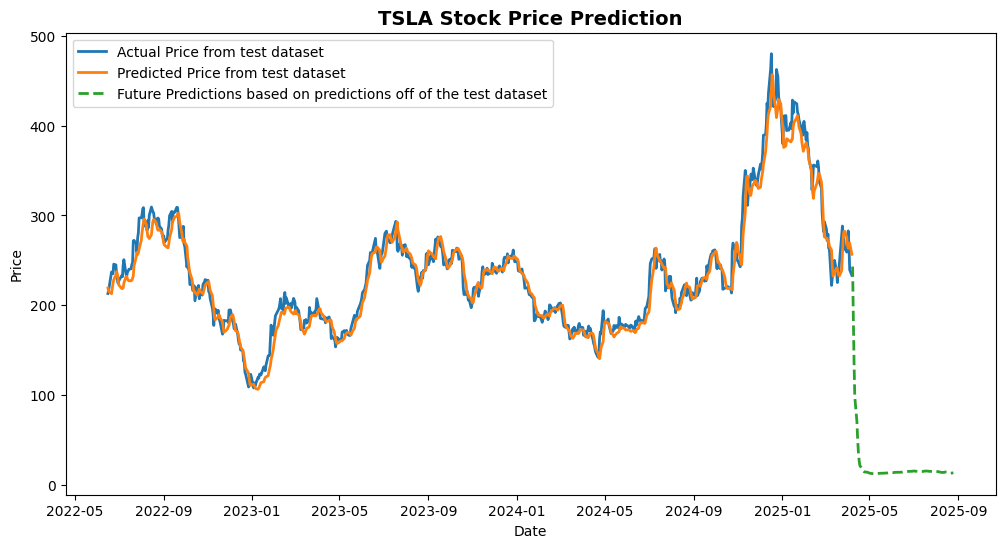

Future Predictions: 243.06604403984758 for date 2025-04-08 00:00:00
Future Predictions: 187.6027442566645 for date 2025-04-09 00:00:00
Future Predictions: 137.22427889617168 for date 2025-04-10 00:00:00
Future Predictions: 98.4361969266809 for date 2025-04-11 00:00:00
Future Predictions: 70.2341121327599 for date 2025-04-14 00:00:00
Future Predictions: 50.316075016465575 for date 2025-04-15 00:00:00
Future Predictions: 36.644933929055924 for date 2025-04-16 00:00:00
Future Predictions: 27.545498783542293 for date 2025-04-17 00:00:00
Future Predictions: 21.7459372160094 for date 2025-04-18 00:00:00
Future Predictions: 18.298346993153235 for date 2025-04-21 00:00:00
Future Predictions: 16.364271394021323 for date 2025-04-22 00:00:00
Future Predictions: 15.277027806875266 for date 2025-04-23 00:00:00
Future Predictions: 14.737112473888821 for date 2025-04-24 00:00:00
Future Predictions: 14.512751980480308 for date 2025-04-25 00:00:00
Future Predictions: 14.365440778462647 for date 2025-04

In [16]:
# Predict and visualize
test_data = scaled_data[train_size - seq_length:]
x_test, y_test = create_sequences(test_data, seq_length)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Predict multiple days into the future using actual data
future_days = 100  # Number of days to predict into the future
future_predictions = []

for _ in range(future_days):
    x_input = np.reshape(test_data[-seq_length:], (1, seq_length, test_data.shape[1]))
    next_prediction = model.predict(x_input)[0, 0]
    future_predictions.append(next_prediction)
    # Append the actual data instead of predicted data
    test_data = np.append(test_data, [[scaled_data[len(test_data), 0], *scaled_data[len(test_data), 1:]]], axis=0)

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(-1, 1), np.zeros((len(future_predictions), scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Extend the index for future predictions
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, freq='B')[1:]

# Assuming your ticker symbol is stored in a variable called 'ticker'

plt.figure(figsize=(12, 6))
plt.title(f'{ticker} Stock Price Prediction', fontsize=14, fontweight='bold')
# Correct the slicing to match the dimensions
actual_prices = scaler.inverse_transform(test_data[seq_length:seq_length + len(data.index[train_size:]), :])[:, 0]

# Ensure the x-axis matches the length of actual_prices
plt.plot(data.index[train_size:], actual_prices, 
         label='Actual Price from test dataset', linewidth=2)

# Ensure predictions align with the same x-axis
plt.plot(data.index[train_size:train_size + len(predictions)], predictions, 
         label='Predicted Price from test dataset', linewidth=2)

# Future predictions remain unchanged
plt.plot(future_dates, future_predictions, 
         label='Future Predictions based on predictions off of the test dataset', linestyle='dashed', linewidth=2)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

for i in range(len(future_dates)):
    print(f"Future Predictions: {future_predictions[i]} for date {future_dates[i]}")